In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
#資料生成
np.random.seed(1)
m = 100
x1 = 10 * np.random.rand(m, 1) - 6
y = 10 + 6 * x1 + 5 * x1**2 + 30 * np.random.randn(m, 1)

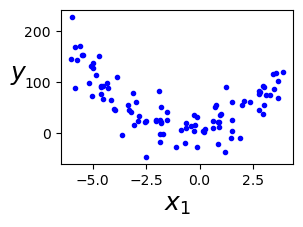

In [7]:
#繪製圖形
plt.figure(figsize=(3,2))
plt.plot(x1, y, 'b.')
plt.xlabel('$x_1$', fontsize=18)       
plt.ylabel('$y$', rotation=0, fontsize=18)     #無底線所以不需要使用$$來命名
plt.show()

In [10]:
#資料前處理
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2, include_bias=False)  #Feature Polynomial轉換(degree=2),且不對bias轉換
x1P = poly.fit_transform(x1)

In [11]:
x1[0],x1P[0]   #顯示x1與轉換後的數值

(array([-1.82977995]), array([-1.82977995,  3.34809468]))

In [16]:
#Feature標準化
from sklearn.preprocessing import StandardScaler

scal = StandardScaler()
x1Ps = scal.fit_transform(x1P)
x1Ps[0]

array([-0.23388437, -0.65991125])

In [18]:
#配飾模型
#使用LinearRegression()

from sklearn.linear_model import LinearRegression

polyReg = LinearRegression()
polyReg.fit(x1Ps, y)

LinearRegression()

In [19]:
polyReg.intercept_, polyReg.coef_

(array([55.51681743]), array([[17.42161695, 54.04329404]]))

In [20]:
#使用SGDRegressor()

from sklearn.linear_model import SGDRegressor

sgdReg = SGDRegressor()
sgdReg.fit(x1Ps, y.ravel())

SGDRegressor()

In [21]:
sgdReg.intercept_, sgdReg.coef_

(array([55.50302123]), array([16.70102324, 53.27843295]))

In [22]:
#Predict

xNew = ([-5],[1])
xNewP = poly.transform(xNew) #Polynomial轉換
xNewPs = scal.transform(xNewP) #標準化

In [23]:
polyReg.predict(xNewP) #使用Linear regression預測

array([[1319.49108365],
       [ 126.98172842]])

In [24]:
sgdReg.predict(xNewPs) #使用SGDRegressor預測

array([113.42124401,  20.02290533])

In [25]:
#建構Pipeline()

from sklearn.pipeline import Pipeline

In [27]:
#建構Polynomial轉換與標準化及LinearRegression的Pipeline
pipReg = Pipeline([
    ('poly', PolynomialFeatures(degree=2, include_bias=False)),
    ('scal', StandardScaler()),
    ('polyReg', LinearRegression())
])

In [29]:
#配飾模型

pipReg.fit(x1,y)

Pipeline(steps=[('poly', PolynomialFeatures(include_bias=False)),
                ('scal', StandardScaler()), ('polyReg', LinearRegression())])

In [30]:
pipReg['polyReg'].intercept_,pipReg['polyReg'].coef_

(array([55.51681743]), array([[17.42161695, 54.04329404]]))

In [31]:
#Predcit

xNew = ([-5],[1])

pipReg.predict(xNew)

array([[113.63626971],
       [ 19.87706932]])

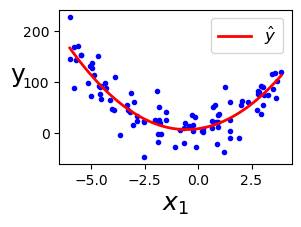

In [35]:
#繪製模型

plt.figure(figsize=(3,2))

x1s = np.linspace(x1.min(),x1.max(),100).reshape(-1,1)
yPred = pipReg.predict(x1s)

plt.plot(x1, y, 'b.')
plt.plot(x1s, yPred, 'r-',linewidth=2, label='$\hat y$')

plt.xlabel('$x_1$' , fontsize=18)
plt.ylabel("y", rotation=0, fontsize=18)
plt.legend(loc='upper right', fontsize=12)

plt.show()